In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn/hist/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0125-02.KMT.nc')
plotvar = data.variables['KMT']
lont = data.variables['TLONG']
latt = data.variables['TLAT']

In [3]:
data.variables['KMT'].shape

(601, 3600)

In [9]:
lont = lont[:,:]
latt = latt[:,:]
plotvar = plotvar[:,:]
plotvar[plotvar <0] = np.nan

ValueError: cannot convert float NaN to integer

In [6]:
plotvar[:,9]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, 28, 30, 30, 30, 31, 31, 31, 32, 32, 32, 32, 32,
       32, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 35, 36,
       36, 36, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39,
       39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40,
       40, 40, 40, 41, 41, 42, 41, 42, 42, 43, 44, 44, 45, 45, 45, 46, 46,
       46, 45, 45, 44, 45, 47, 50, 52, 52, 51, 51, 50, 50, 50, 50, 50, 50,
       51, 52, 52, 52, 52, 53, 53, 53, 53, 53, 54, 54, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 55, 55, 55,
       55, 55, 55, 55, 55

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: No contour levels were found within the data range.


Text(0.5, 0, 'TIME 0121-09 (TEMP) 50 layer')

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


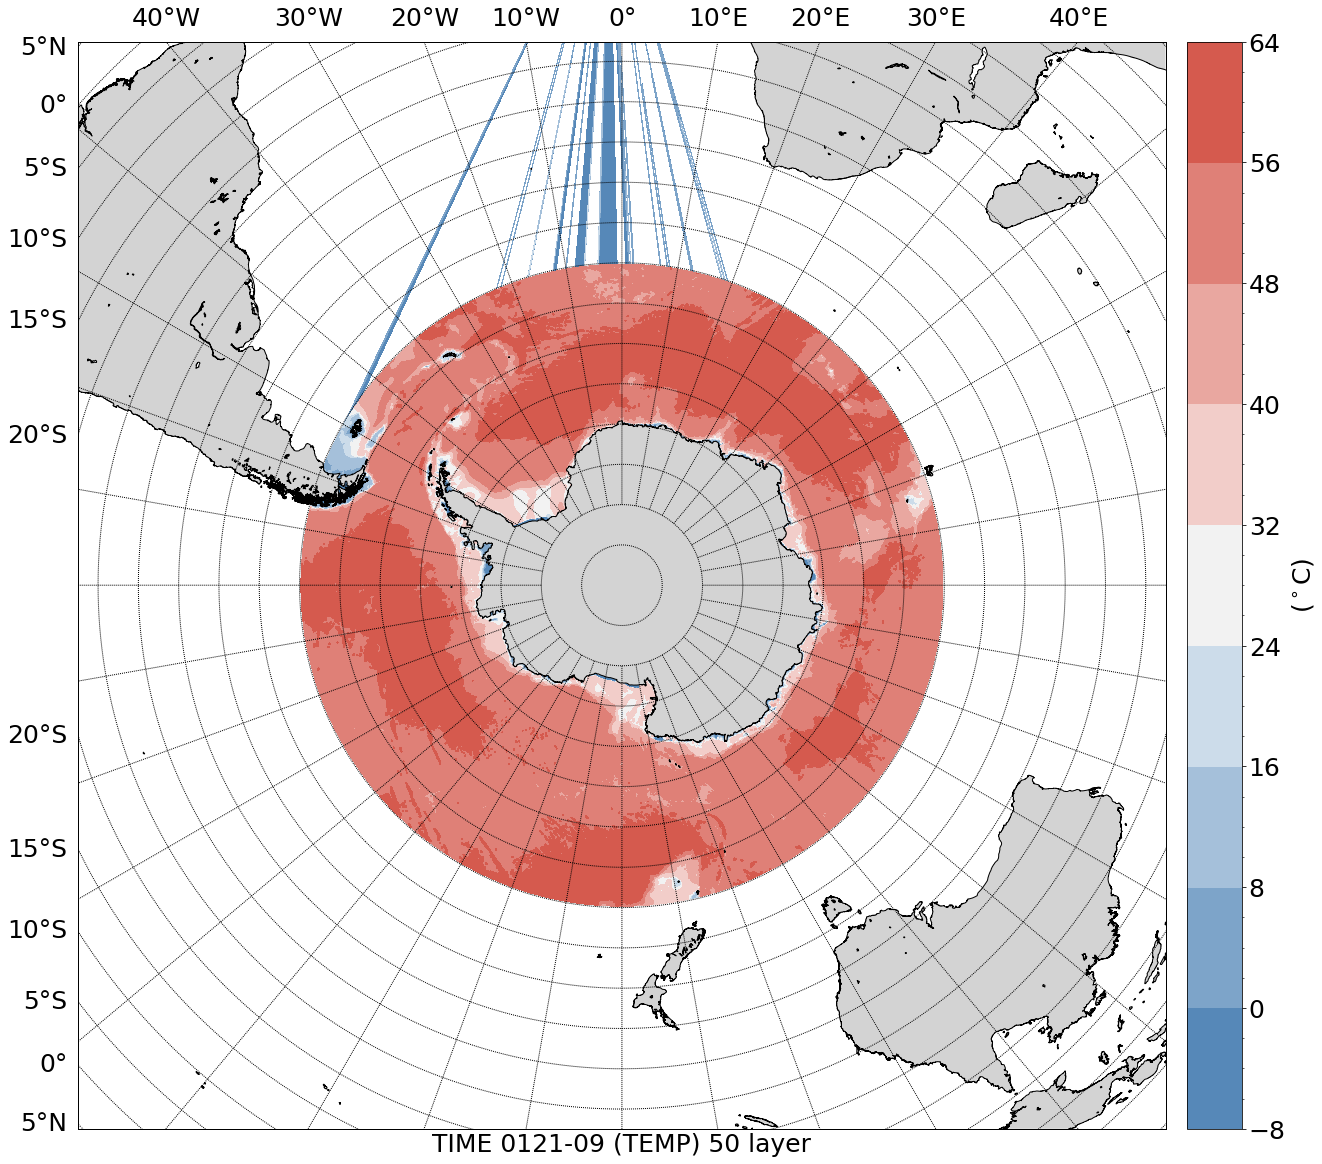

In [7]:
nice_cmap=sns.diverging_palette(245, 15, n=11,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([1,30,100,130,150,170,190,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-4,-0.8,-0.4,-0.2,0,0.2,0.4,0.8,1.2,12]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'25'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 15000000,height = 15000000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,plotvar,cmap = nice_cmap)
#CP = map.contourf(x,y,plotvar,cmap = new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels)
#CS=map.contour(x,y,plotvar,[0.1,0.2],colors = 'b', linestyles = 'solid',linewidths=3)
CS=map.contour(x,y,plotvar,[700],colors = 'r', linestyles = 'solid',linewidths=1)
plt.clabel(CS, inline=0.1, fontsize=30)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extend='both')
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=25) 
cbar.set_label('($^\circ$C)', **my_font)
plt.xlabel("TIME 0121-09 (TEMP) 50 layer",**my_font)